# Exploring, Analysing, and Visualizing Fuel Data 

# Step 1
- Import the modules that will be using in this assignment:

In [33]:
# Importing important libraries for analyzing fuel data
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
# make figure size
plt.figure(figsize=(10,8))


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

# Step 2

I have been given a fuel data in csv file. 

Load the dataset and inspect it:

    Load fuel_ferc1.csv into a DataFrame called fuel_data


- First downloading fuel data from github repository and save to local directory for offline use 


In [36]:
url = url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_df = pd.read_csv(url, error_bad_lines=False)

Writing fuel data to local csv file

In [37]:
fuel_df.to_csv('fuel_ferc1.csv', index=False)

Load the local fuel_ferc1.csv file into DataFrame called fuel_data and inspect it

In [6]:
# reading local fuel data for analysing
fuel_data = pd.read_csv('fuel_ferc1.csv')
# inspect the data
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [39]:
# Show the data type info
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


Summary statistics of fuel data

In [40]:
# Describe the fuel data
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2010_12_51_0_4,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [41]:
# shows the kurtios of the fuel data in two decimal points
round(fuel_data.kurt(), 2)

utility_id_ferc1                    1.09
report_year                        -1.15
fuel_qty_burned                   651.37
fuel_mmbtu_per_unit                55.60
fuel_cost_per_unit_burned         485.26
fuel_cost_per_unit_delivered    11765.05
fuel_cost_per_mmbtu             29489.13
dtype: float64

In [17]:
# shows the skewness of the fuel data in two decimal points
round(fuel_data.skew(), 2)

utility_id_ferc1                  0.61
report_year                       0.01
fuel_qty_burned                  15.85
fuel_mmbtu_per_unit               4.14
fuel_cost_per_unit_burned        19.79
fuel_cost_per_unit_delivered    105.01
fuel_cost_per_mmbtu             171.68
dtype: float64

# Step 3 


Let's start by learning a bit more about our data. Answer each of the following questions.

- How many missing values are in each columns  in the fuel_data DataFrame?


In [18]:
# count the number of null values in fuel data
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

- The analyses shows that the fuel unit column missing 180 values
- We fill "mcf" to the missing values using fillna()

In [19]:
fuel_data[['fuel_unit']] = fuel_data['fuel_unit'].fillna(value='mcf')

In [20]:
# Check if missing values have been filled 
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

- What are the different values of fuel_unit?

In [21]:
fuel_data.fuel_unit.unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', 'mwdth', 'mmbtu', 'mwhth',
       'gal'], dtype=object)

- How many different values of plant_name_ferc1?

In [22]:
fuel_data.plant_name_ferc1.nunique()

2315

- How many unique value in each of fuel_unit in the DataFrame?

In [23]:
# count the sum of unique value in each fuel_unit
fuel_unit = fuel_data.groupby('fuel_unit')['fuel_unit'].count()
fuel_unit

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11534
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [24]:
# create a DataFrame of fuel unit
fuel_unit = pd.DataFrame({'unit': ['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
                      'count': [7998, 84, 464, 110, 11534, 180, 95, 100, 8958]})
fuel_unit

,unit,count
0,BBL,7998
1,GAL,84
2,GRAMSU,464
3,KGU,110
4,MCF,11534
5,MMBTU,180
6,MWDTH,95
7,MWHTH,100
8,TON,8958


- How many report years in the DataFrame?

In [25]:
fuel_data.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

# Step 4
Let's do some analyses of the following catogories
 
    - report_year
    - plant_name_ferc1,
    - fuel_type_code_pudl,
    - fuel_unit

- Which fuel type is the highest and lowest in average?

In [26]:
# Calculating the verage of fuel_qty_burned in each type code
fuel_qty_burned = fuel_data.groupby('fuel_type_code_pudl').fuel_qty_burned.sum().reset_index()
fuel_qty_burned['average'] = fuel_qty_burned.fuel_qty_burned / fuel_qty_burned.fuel_qty_burned.sum()
fuel_qty_burned

,fuel_type_code_pudl,fuel_qty_burned,average
0,coal,1.626898e+10,0.210159
1,gas,5.562880e+10,0.718599
2,nuclear,4.462058e+09,0.057640
3,oil,5.089737e+08,0.006575
4,other,4.923388e+08,0.006360
5,waste,5.168139e+07,0.000668


In [27]:
# average fuel cost per unit burned
fuel_cost_burned = fuel_data.groupby('fuel_type_code_pudl').fuel_cost_per_unit_burned.sum().reset_index()
fuel_cost_burned['average'] = fuel_cost_burned.fuel_cost_per_unit_burned / fuel_cost_burned.fuel_cost_per_unit_burned.sum()
fuel_cost_burned

,fuel_type_code_pudl,fuel_cost_per_unit_burned,average
0,coal,576254.381,0.093549
1,gas,156891.829,0.025470
2,nuclear,4053318.428,0.658012
3,oil,1361824.819,0.221077
4,other,3048.394,0.000495
5,waste,8607.492,0.001397


In [28]:
# average fuel cost per unit delivered
fuel_cost_delivered = fuel_data.groupby('fuel_type_code_pudl').fuel_cost_per_unit_delivered.count().reset_index()
fuel_cost_delivered['average'] = fuel_cost_delivered.fuel_cost_per_unit_delivered/ fuel_cost_delivered.fuel_cost_per_unit_delivered.sum()
fuel_cost_delivered

,fuel_type_code_pudl,fuel_cost_per_unit_delivered,average
0,coal,8547,0.289503
1,gas,11486,0.389053
2,nuclear,818,0.027707
3,oil,8064,0.273143
4,other,167,0.005657
5,waste,441,0.014938


In [29]:
# average fuel cost per unit delivered over year
fuel_cost_delivered_over_year = fuel_data.groupby('report_year').fuel_cost_per_unit_delivered.count().reset_index()
fuel_cost_delivered_over_year['average'] = fuel_cost_delivered_over_year.fuel_cost_per_unit_delivered/ fuel_cost_delivered_over_year.fuel_cost_per_unit_delivered.sum()
fuel_cost_delivered_over_year

,report_year,fuel_cost_per_unit_delivered,average
0,1994,1235,0.041832
1,1995,1201,0.040680
2,1996,1088,0.036853
3,1997,1094,0.037056
4,1998,1107,0.037496
5,1999,1050,0.035565
6,2000,1373,0.046506
7,2001,1356,0.045930
8,2002,1205,0.040816
9,2003,1211,0.041019


# Step 5
Data Visualization
- Visualizing the fuel data based on specific criterias

Because of the extreme range of the values for the fuel unit, we can plot the barchart by taking the logarithm of the y-axis as follows:

Text(0.5, 1.0, 'Number of Unit per Fuel Unit')

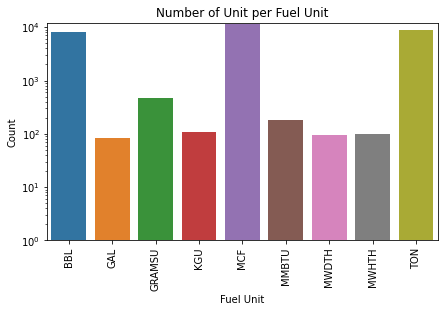

In [38]:
# Make bar chart here
plt.figure(figsize=(7,4))
g = sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xticks(rotation=90)
g.set_yscale('log')
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')
plt.ylabel('Count')
plt.title('Number of Unit per Fuel Unit')

Text(0, 0.5, 'Average Cost')

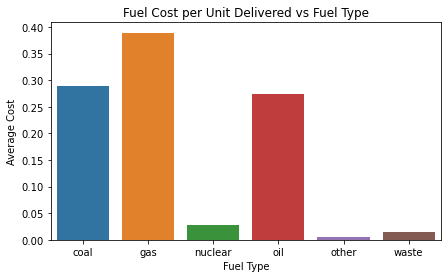

In [39]:
plt.figure(figsize=(7,4))
sns.barplot(x='fuel_type_code_pudl', y='average', data=fuel_cost_delivered)
plt.title('Fuel Cost per Unit Delivered vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Cost')

Text(0, 0.5, 'Fuel Cost per Unit')

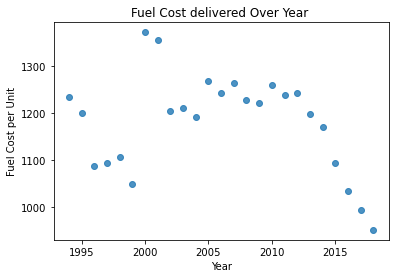

In [34]:
sns.regplot(x=fuel_cost_delivered_over_year['report_year'], y=fuel_cost_delivered_over_year['fuel_cost_per_unit_delivered'], fit_reg=False)
plt.title("Fuel Cost delivered Over Year ")
plt.xlabel("Year")
plt.ylabel("Fuel Cost per Unit")

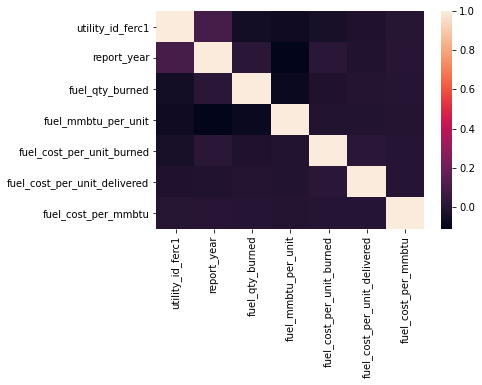

In [40]:
sns.heatmap(fuel_data.corr())

# Conclusion

Data Science is an interesting field of philosophy for future world's bigest company.
I have tried to understand and analyses the Fuel Data above. I hope,  I have gain a little bit knowledge about data ananlyses, exploration, data wrangling, statistical analyses and visualization.

